In [59]:
import pandas as pd
import os

In [60]:
def read_day_ahead_price(path):
        return (pd.read_csv(path)
                        .melt(ignore_index=True, var_name="date", value_name="price", id_vars=["Unnamed: 0"])
                        .rename(columns={"Unnamed: 0": "day"})
                        .dropna()
                        .assign(
                                date=lambda x: pd.to_datetime(x.day.astype(str) + "-" + x.date, format="%d-%b-%y"),
                                price = lambda x: x.price.str.replace(",", "").astype(int)
                        )
                        .drop(columns="day")
                        .set_index("date")
                        .sort_index()
                        )

<Axes: xlabel='date'>

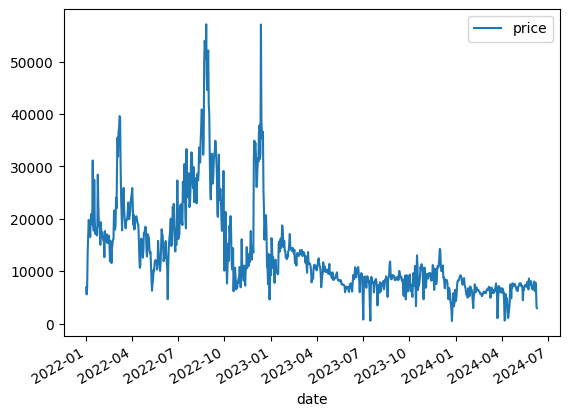

In [61]:
base_path = "raw_data/"

pd.concat([read_day_ahead_price(base_path + i) for i in os.listdir(base_path)]).sort_index().plot()